<a href="https://colab.research.google.com/github/MahreenAthar/ObjectRecognition-Cifar10/blob/main/i191712_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [29]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Xy_test shape: ", y_test.shape)
# To check a sample image (from X_train) uncomment the line below
# X_train[0]
# To check a sample label (from y_train) uncomment the line below
# y_train[0]

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000,)
X_test shape:  (10000, 32, 32, 3)
Xy_test shape:  (10000, 1)


In [10]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

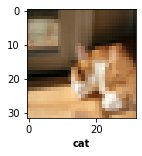

In [33]:
classLabels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# print(y_train[0], classLabels[y_train[0]])

def plotImageSample(X, y, index):
  plt.figure(figsize = (10, 2))
  plt.imshow(X[index])
  plt.xlabel(classLabels[y[index]], weight="bold")

randomImageNumber = np.random.randint(1, 50000)
plotImageSample(X_train, y_train, randomImageNumber)